# Cogs 108 Final Project - How has Gun Violence Affect the Polls

### Group Members and Contributions
- Victor Chi(A14489640)
- Evan Kay (A)
- Weilin Liu(A14713406)
- Christopher Rocha(A92080262)

## Indroduction and Background

### Background

Gun violence has become a very hot topic lately due to the mass shootings at schools, concerts, and even in our own neighborhoods. It has emboldened both sides of the political spectrum; driving many to the polls to vote their beliefs and demand changes to the system. Even though this issue is a very controversial topic, we can not deny how it has greatly polarized this nation and caused a great schism between conservatives and liberals, Democrats and Republicans. On that note, we wanted to tackle this trend and see how congressional districts have changed due to gun violence; ultimately seeing who is the dominant party of the state. There are many articles and research on the internet, due to it being a hot topic, but it is very divided and has not reached a final verdict. That is why we want to use data to guide us in a path that will triangulate us to the right conclusions and possibly see how a district will swing based on the increase or decrease of gun violence. 

### Research Question
How does gun violence in each state affect how voters vote, either Democrat or Republican, when election day comes along?

### Hypothesis
We believe that states with a higher rate of gun violence will tend to vote more Democrat, while states with less gun violence will tend to vote more Republican.

### Datasets
Contains information about gun violence in each congressional district since 2012
- Dataset Name: Gun Violence Data
- Link to Dataset: https://www.kaggle.com/jameslko/gun-violence-data/home
- Number of observations: over 260k

Contains results of congressional voting data for each district
- Dataset Name: Congressional Voting Data
- Link to Dataset: http://library.cqpress.com/elections/download-data.php?filetype=&office=3&areatype=1&year=20122020&format=3&license=on&emailto=&emailfrom=
- Number of observations:  1600


## Dataset Cleaning

In [1]:
#Packages needed to clean the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from datascience import *

### Cleaning Congressional Voting Data
The congressional voting data was a very difficult dataset to obtain due to the website's limitations. It only allowed the user to download a certain amount of states at a time, so as a result the states had to be downloaded in multiple files. To clean our data efficiently we will: 
- Read in all our datasets one by one as csv files.
- Concatenate them all together so cleaning the dataset as one will be much faster.
- Remove all columns except for the state, raceYear, and party winner.
- Remove NaN and other titles that were considered as rows, when the data sets were concatenated together.


In [2]:
# Reading in all voting records
states_1 = pd.read_csv("Alabama.csv",skiprows= 2)
states_2 = pd.read_csv('Alaska-Hawaii.csv', skiprows =2)
states_3 = pd.read_csv('Idaho-Massachusets.csv', skiprows = 2)
states_4 = pd.read_csv('Michigan to New Mexico.csv', skiprows = 2)
states_5 = pd.read_csv('New York-South Dakota.csv', skiprows = 2)
states_6 = pd.read_csv('Tennesee-Wyoming.csv', skiprows = 2)
states_1.head()

,Office,State,CensusPop,raceYear,Area,AreaNumber,RedistrictedDate,RepVotes,RepCandidate,RepStatus,...,ThirdVotes,ThirdCandidate,ThirdStatus,OtherVotes,PluralityVotes,PluralityParty,ThirdVotesTotalPercent,RepVotesMajorPercent,DemVotesMajorPercent,RaceNotes
0,House,Alabama,NaN,2018.0,District 1,1.0,20120101.0,"153,228","Byrne, Bradley",Incumbent,...,163,Write-In,Challenger,NaN,"64,002",R,0.07,63.20,36.80,NaN
1,House,Alabama,NaN,2016.0,District 1,1.0,20120101.0,"208,083","Byrne, Bradley",Incumbent,...,"7,810",Write-In,Challenger,NaN,"200,273",R,3.62,100.00,0.00,NaN
2,House,Alabama,NaN,2014.0,District 1,1.0,20120101.0,"103,758","Byrne, Bradley",Incumbent,...,198,Write-In,Challenger,NaN,"55,480",R,0.13,68.25,31.75,NaN
3,House,Alabama,NaN,2012.0,District 1,1.0,20120101.0,"196,374","Bonner, Josiah Robbins Jr.",Incumbent,...,"4,302",Scattered Write-In,Challenger,NaN,"192,072",R,2.14,100.00,0.00,NaN
4,House,Alabama,NaN,2018.0,District 2,2.0,20120101.0,"138,879","Roby, Martha",Incumbent,...,420,Write-In,Challenger,NaN,"51,948",R,0.19,61.50,38.50,NaN


In [3]:
# Concatenating all the states together
final_states = pd.concat([states_1, states_2,states_3,states_4,states_5,states_6])

In [48]:
# Cleaning dataset
congressional_data = final_states[['State','PluralityParty','raceYear']].dropna()
cleaned_congressional_data = congressional_data[congressional_data['State'] != 'State']
cleaned_congressional_data['raceYear'] = cleaned_congressional_data['raceYear'].astype(int)
cleaned_congressional_data.head()

C:\Users\Victor Chi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,State,PluralityParty,raceYear
0,Alabama,R,2018
1,Alabama,R,2016
2,Alabama,R,2014
3,Alabama,R,2012
4,Alabama,R,2018


### Cleaning Gun Violence Data
The gun violence data set was already pretty clean since we obtained it from kaggle. However, it included a lot of information that we did not need to do our exploratory analysis. To clean our data we will:
- Read in our dataset
- Remove all columns except for the state and date
- Drop rows with NaN because they will not provide us with information we want

In [5]:
# Reading in Gun violence data
gun_data = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
# We will remove NaN because we will not know which congressional district the violence occurd
cleaned_gun_data = gun_data[['state','date','congressional_district']].dropna()
# Converting all the date to Years and dropping date
cleaned_gun_data['Date'] = pd.to_datetime(cleaned_gun_data['date'], errors='coerce')
cleaned_gun_data['Year'] = cleaned_gun_data['Date'].dt.year
cleaned_gun_data = cleaned_gun_data.drop(['date','Date','congressional_district'], axis = 1)
cleaned_gun_data.head()

,state,Year
0,Pennsylvania,2013
1,California,2013
2,Ohio,2013
3,Colorado,2013
4,North Carolina,2013


## Data Wrangling / Visualization
We will use a bar plot to visualize the dominance of each party per congressional cycle. There will also be a trend line visualizing the total amount of violence in that state per year.

#### Making Functions to clean our data and make new data tables 

In [22]:
# Function to find total amound of gun violence in a specific state per year
def total_violence(state):
    total = []
    for i in range(2013,2019, 2):
        year1 = cleaned_gun_data.loc[cleaned_gun_data['Year'] == i]
        year2 = cleaned_gun_data.loc[cleaned_gun_data['Year'] == i+1]
        count = len(year1.loc[year1['state'] == state]) + len(year2.loc[year2['state'] == state])
        total.append(count)
    return total
df_total_violence.head()

,2014,2016,2018
Alabama,1317,2256,1644
Alaska,132,793,232
Arizona,561,1002,691
Arkansas,572,1201,950
California,3750,6732,5310


In [23]:
#Function to find percentage Republican per election cycle in each state.
def percent_rep(s):
    percentage_rep = []
    for i in range(2014, 2019, 2):
        target = cleaned_congressional_data[(cleaned_congressional_data['State'] == s) & (cleaned_congressional_data['raceYear'] == i)]
        rep = len(target.loc[target['PluralityParty'] == 'R'])
        dem = len(target.loc[target['PluralityParty'] == 'D'])
        total = rep + dem
        percentage_rep.append(rep/total)
    return percentage_rep

In [24]:
#Function to find percentage Democrat per each election cycle in each state.
def percent_dem(s):
    percentage_dem = []
    for i in range(2014, 2019, 2):
        target = cleaned_congressional_data[(cleaned_congressional_data['State'] == s) & (cleaned_congressional_data['raceYear'] == i)]
        rep = len(target.loc[target['PluralityParty'] == 'R'])
        dem = len(target.loc[target['PluralityParty'] == 'D'])
        total = rep + dem
        percentage_dem.append(dem/total)
    return percentage_dem

In [25]:
#Making new data table plotting total violence in years of congressional elections
list_of_state = cleaned_congressional_data['State'].unique().tolist()
total_violence_list = []
for state in list_of_state:
    total_violence_list.append(total_violence(state))
df_total_violence = pd.DataFrame(np.array(total_violence_list), index=list_of_state, columns=[2014, 2016, 2018])
df_total_violence.head()

,2014,2016,2018
Alabama,1317,2256,1644
Alaska,132,793,232
Arizona,561,1002,691
Arkansas,572,1201,950
California,3750,6732,5310


In [26]:
#Percent Republican in each state
percent_rep_list = []
for state in list_of_state:
    percent_rep_list.append(percent_rep(state))
df_percent_rep = pd.DataFrame(np.array(percent_rep_list), index=list_of_state, columns=[2014, 2016, 2018])
df_percent_rep.head()

,2014,2016,2018
Alabama,0.857143,0.857143,0.857143
Alaska,1.000000,1.000000,1.000000
Arizona,0.555556,0.555556,0.444444
Arkansas,1.000000,1.000000,1.000000
California,0.264151,0.269231,0.132075


In [31]:
#Percent Democrat in each state
percent_dem_list = []
for state in list_of_state:
    percent_dem_list.append(percent_dem(state))
df_percent_dem = pd.DataFrame(np.array(percent_dem_list),index = list_of_state, columns = [2014, 2016, 2018])
df_percent_dem.head()

,2014,2016,2018
Alabama,0.142857,0.142857,0.142857
Alaska,0.000000,0.000000,0.000000
Arizona,0.444444,0.444444,0.555556
Arkansas,0.000000,0.000000,0.000000
California,0.735849,0.730769,0.867925


### Democrats and Republicans in 2014 

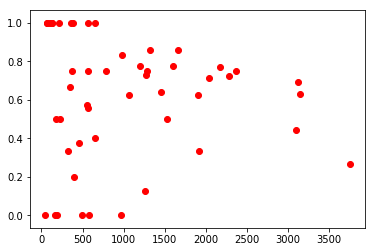

In [42]:
x = df_total_violence[2014].tolist()
y = df_percent_rep[2014].tolist()
plt.scatter(x, y, label="2014", color="red")

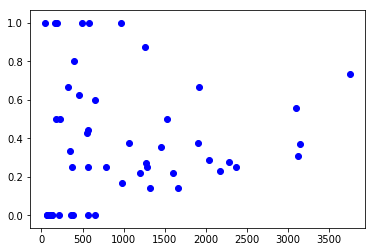

In [43]:
x = df_total_violence[2014].tolist()
y = df_percent_dem[2014].tolist()
plt.scatter(x, y, label="2014", color="blue")

### Democrats and Republicans in 2016

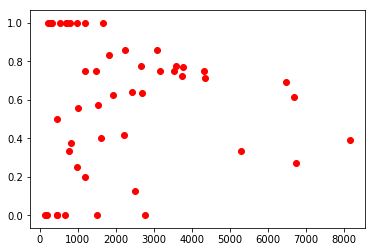

In [44]:
x = df_total_violence[2016].tolist()
y = df_percent_rep[2016].tolist()
plt.scatter(x, y, label="2016", color="red")

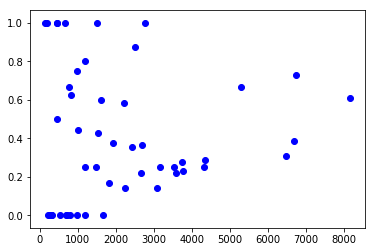

In [45]:
x = df_total_violence[2016].tolist()
y = df_percent_dem[2016].tolist()
plt.scatter(x, y, label="2016", color="blue")

### Democrats and Republicans in 2018

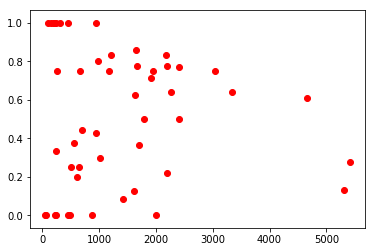

In [58]:
x = df_total_violence[2018].tolist()
y = df_percent_rep[2018].tolist()
plt.scatter(x, y, label="2018", color="red")

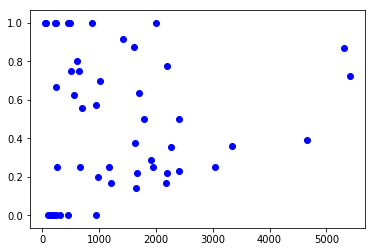

In [59]:
x = df_total_violence[2018].tolist()
y = df_percent_dem[2018].tolist()
plt.scatter(x, y, label="2018", color="blue")

## Key Swing States
This will allow us to see if gun violence does have an impact on these key states. This is so because they are not considered "solid" Democrat or Republican, which would give us a gauge of how important gun violence is to them.

In [61]:
# Gathering all the swing states together.
swing_states = ['Colorado', 'Florida', 'Iowa', 'Michigan', 'Minnesota', 'Ohio', 'Nevada', 'New Hampshire', 'North Carolina', 'Pennsylvania', 'Virginia', 'Wisconsin']
df_total_violence_swing = df_total_violence.loc[swing_states]
df_percent_rep_swing = df_percent_rep.loc[swing_states]
df_percent_dem_swing = df_percent_dem.loc[swing_states]

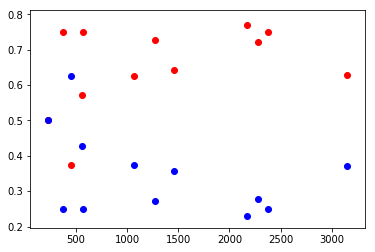

In [62]:
x = df_total_violence_swing[2014].tolist()
y =  df_percent_rep_swing[2014].tolist()
plt.scatter(x, y, label="2014", color="red")
x = df_total_violence_swing[2014].tolist()
y = df_percent_dem_swing[2014].tolist()
plt.scatter(x, y, label="2014", color="blue")

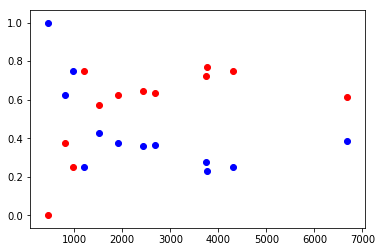

In [63]:
x = df_total_violence_swing[2016].tolist()
y =  df_percent_rep_swing[2016].tolist()
plt.scatter(x, y, label="2016", color="red")
x = df_total_violence_swing[2016].tolist()
y = df_percent_dem_swing[2016].tolist()
plt.scatter(x, y, label="2016", color="blue")

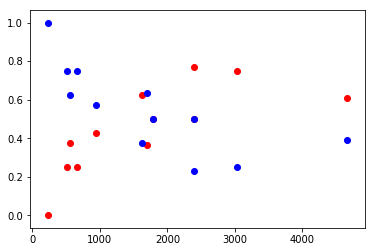

In [64]:
x = df_total_violence_swing[2018].tolist()
y =  df_percent_rep_swing[2018].tolist()
plt.scatter(x, y, label="2018", color="red")
x = df_total_violence_swing[2018].tolist()
y = df_percent_dem_swing[2018].tolist()
plt.scatter(x, y, label="2018", color="blue")

# Running Statistical Analysis